In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding

from tensorflow.keras.models import Model

In [179]:
# you can import this from kaggle

In [180]:
#data processing

In [181]:
df = pd.read_csv('potentially_abuse_V2.csv',encoding='unicode_escape')

In [182]:
df.head()

,label,selftext,role
0,1,However my stepfather was intoxicated and ass...,perpetrator
1,1,I (27f) have recently escaped an abusive relat...,victim
2,1,Is anyone aware of an online support group for...,victim
3,1,Has anyone had to show up for the abuser__ con...,victim
4,1,There was a fair amount of financial abuse in...,witness


In [183]:
# drop unnecessary columns
df = df.drop(["role"], axis=1)

In [184]:
df.head()

,label,selftext
0,1,However my stepfather was intoxicated and ass...
1,1,I (27f) have recently escaped an abusive relat...
2,1,Is anyone aware of an online support group for...
3,1,Has anyone had to show up for the abuser__ con...
4,1,There was a fair amount of financial abuse in...


In [185]:
# rename columns to something better
df.columns = ['labels', 'data']

In [186]:
df.head()

,labels,data
0,1,However my stepfather was intoxicated and ass...
1,1,I (27f) have recently escaped an abusive relat...
2,1,Is anyone aware of an online support group for...
3,1,Has anyone had to show up for the abuser__ con...
4,1,There was a fair amount of financial abuse in...


In [187]:
df["label_numerics"]= df["labels"]
Y = df["label_numerics"].values

In [188]:
df

,labels,data,label_numerics
0,1,However my stepfather was intoxicated and ass...,1
1,1,I (27f) have recently escaped an abusive relat...,1
2,1,Is anyone aware of an online support group for...,1
3,1,Has anyone had to show up for the abuser__ con...,1
4,1,There was a fair amount of financial abuse in...,1
...,...,...,...
995,0,He told me that he would NEVER lay a finger o...,0
996,0,But he told me that he has a problem with alc...,0
997,0,The first time he Was drunk and I pissed him ...,0
998,1,He dragged me down my hallway into my garage,1


In [189]:
df['b_labels'] = df['labels']
Y = df['b_labels'].values

In [190]:
#TRAIN TEST SPLIT

In [191]:
df_train, df_test,Ytrain, Ytest= train_test_split(df['data'], Y, test_size=0.2)

In [192]:
max_words=2000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_train)

In [193]:
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test= tokenizer.texts_to_sequences(df_test)

In [194]:
sequences_train

[[16, 25, 105, 109, 71, 4, 76, 93, 224, 240, 225, 1087],
 [2,
  8,
  346,
  315,
  72,
  260,
  204,
  1,
  205,
  17,
  2,
  8,
  346,
  1088,
  28,
  165,
  2,
  1,
  26,
  347,
  206,
  1,
  98,
  24,
  385,
  3,
  19,
  207,
  106,
  9,
  20,
  386],
 [1, 69, 1089, 166, 3, 145, 6, 208, 65, 52, 1090, 13, 316],
 [54, 166, 3, 711, 4, 457, 3, 348, 1091, 1092, 209],
 [1, 174, 53, 140, 3, 1093],
 [4,
  146,
  29,
  25,
  27,
  187,
  5,
  4,
  349,
  110,
  2,
  4,
  111,
  55,
  1,
  126,
  458,
  1094,
  1095,
  23,
  42,
  1,
  69,
  1096,
  13,
  554,
  241,
  317,
  555,
  387,
  3,
  112,
  712,
  2,
  88,
  556,
  43,
  99,
  101,
  2,
  459,
  77,
  4,
  127,
  68,
  6,
  557,
  2,
  15,
  29,
  1097,
  57,
  11,
  20,
  2,
  1098,
  2,
  1099,
  4,
  127,
  55,
  460,
  113],
 [1, 98, 30, 20, 119, 57, 713, 31, 9, 4, 210],
 [23, 7, 1100, 388, 1101, 6, 714],
 [1,
  120,
  3,
  53,
  44,
  1,
  70,
  389,
  17,
  2,
  46,
  12,
  261,
  66,
  242,
  54,
  1102,
  3,
  315,
  4,
  3

In [195]:
sequences_test

[[6, 151, 86, 73, 1, 758, 31, 3, 4, 93, 5],
 [8, 107, 17, 2, 128, 1750, 27, 13, 17],
 [4, 320, 115, 467, 3, 48, 321, 45, 5, 9, 80, 102],
 [1,
  174,
  53,
  167,
  15,
  1922,
  5,
  24,
  200,
  167,
  97,
  1,
  1327,
  16,
  1,
  694,
  44,
  20,
  485,
  515,
  1019,
  1,
  59,
  1989],
 [4, 111, 18],
 [63,
  198,
  32,
  11,
  35,
  133,
  1,
  19,
  397,
  275,
  761,
  3,
  48,
  2,
  28,
  11,
  20,
  238,
  110,
  1942,
  39,
  1318],
 [1,
  26,
  504,
  106,
  3,
  3,
  117,
  447,
  495,
  343,
  239,
  49,
  90,
  860,
  81,
  326,
  49,
  50,
  926,
  945],
 [1, 174, 53, 44, 20, 18, 88, 35],
 [4, 104, 18, 224, 300, 17, 76, 559],
 [7, 149, 123, 51, 8, 268, 47, 130, 8, 294, 5],
 [175,
  1,
  145,
  24,
  4,
  103,
  2,
  1,
  19,
  25,
  819,
  14,
  38,
  203,
  86,
  34,
  19,
  25,
  956,
  779,
  170,
  14,
  38,
  105,
  32],
 [1, 37, 6, 202, 11, 2, 537, 187, 22, 387, 3, 1836, 2],
 [8, 74, 44, 1, 92, 3, 7, 966, 8, 5],
 [1, 26, 19, 562, 926, 57, 11, 6],
 [34, 179, 464, 9

In [196]:
tokenizer.word_docs

defaultdict(int,
            {'my': 309,
             'went': 8,
             'far': 1,
             'been': 80,
             '2': 22,
             'husband': 27,
             'abuser': 33,
             'finally': 11,
             'days': 19,
             'it': 97,
             'since': 33,
             'too': 11,
             'how': 31,
             'again': 13,
             'put': 12,
             'her': 68,
             'gonna': 5,
             'this': 89,
             'dumb': 5,
             'so': 71,
             'just': 57,
             'fucking': 6,
             'and': 340,
             'out': 63,
             'times': 11,
             'to': 277,
             'i': 419,
             'feel': 24,
             'situation': 5,
             'myself': 21,
             'in': 167,
             'called': 12,
             'see': 7,
             'scared': 12,
             'have': 90,
             'many': 9,
             'he': 180,
             'freak': 1,
             'trying': 11,
        

In [197]:
V= len(tokenizer.word_docs) # NO OF UNIQUE TOKENS
V

2192

In [198]:
#Pad TRAIN DATA sequences with max length T 

In [199]:
data_train = pad_sequences(sequences_train)

In [200]:
data_train

array([[   0,    0,    0, ...,  240,  225, 1087],
       [   0,    0,    0, ...,    9,   20,  386],
       [   0,    0,    0, ..., 1090,   13,  316],
       ...,
       [   0,    0,    0, ...,   14, 1085,   32],
       [   0,    0,    0, ...,   11,    4,  110],
       [   0,    0,    0, ...,    3, 1086,  239]], dtype=int32)

In [201]:
data_train.shape

(800, 1321)

In [202]:
T= data_train.shape[1]

In [203]:
T

1321

In [204]:
#Pad TEST DATA sequences with max length T

In [205]:
data_test = pad_sequences(sequences_test, maxlen=T)


In [206]:
data_test

array([[   0,    0,    0, ...,    4,   93,    5],
       [   0,    0,    0, ...,   27,   13,   17],
       [   0,    0,    0, ...,    9,   80,  102],
       ...,
       [   0,    0,    0, ...,    9,    4,  296],
       [   0,    0,    0, ..., 1622,  930,  506],
       [   0,    0,    0, ...,    0,   54,   50]], dtype=int32)

In [207]:
data_train.shape

(800, 1321)

In [208]:
data_test.shape

(200, 1321)

In [209]:
data_train.shape[1]

1321

In [220]:
V= len(tokenizer.word_docs)
T = data_train.shape[1] #features

In [221]:
 #TF SHAPES
#   2000(word_embeddings) x D(just choose dimensions)x  T 162(features)

In [240]:
# Create the model

# We get to choose embedding dimensionality
D = 20

# Hidden state dimensionality
M = 15

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i) #return word vectors 
x = LSTM(M, return_sequences=True)(x) 
x = GlobalMaxPooling1D()(x)  #long term dependancies
x = Dense(1, activation='sigmoid')(x) #binary

model = Model(i, x)
model.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 1321)]            0         
                                                                 
 embedding_23 (Embedding)    (None, 1321, 20)          43860     
                                                                 
 lstm_20 (LSTM)              (None, 1321, 15)          2160      
                                                                 
 global_max_pooling1d_20 (Gl  (None, 15)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_20 (Dense)            (None, 1)                 16        
                                                                 
Total params: 46,036
Trainable params: 46,036
Non-trainable params: 0
______________________________________________________

In [241]:
#COMPILE THE MODEL

In [242]:
# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='Adamax',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/10
25/25 [==============================] - 7s 223ms/step - loss: 0.6913 - accuracy: 0.5263 - val_loss: 0.6914 - val_accuracy: 0.4800
Epoch 2/10
25/25 [==============================] - 5s 205ms/step - loss: 0.6842 - accuracy: 0.5288 - val_loss: 0.6858 - val_accuracy: 0.4800
Epoch 3/10
25/25 [==============================] - 5s 206ms/step - loss: 0.6635 - accuracy: 0.5663 - val_loss: 0.6593 - val_accuracy: 0.5600
Epoch 4/10
25/25 [==============================] - 5s 207ms/step - loss: 0.5887 - accuracy: 0.7450 - val_loss: 0.6013 - val_accuracy: 0.7800
Epoch 5/10
25/25 [==============================] - 6s 230ms/step - loss: 0.5096 - accuracy: 0.8612 - val_loss: 0.5680 - val_accuracy: 0.8100
Epoch 6/10
25/25 [==============================] - 5s 215ms/step - loss: 0.4357 - accuracy: 0.9125 - val_loss: 0.5418 - val_accuracy: 0.8050
Epoch 7/10
25/25 [==============================] - 5s 204ms/step - loss: 0.3621 - accuracy: 0.9350 - val_loss: 0.4950 - val_accur

In [244]:
import matplotlib.pyplot as plt

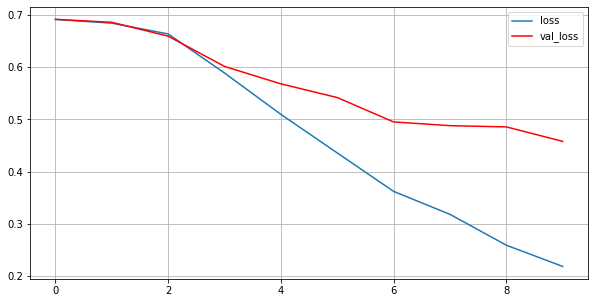

In [245]:
plt.figure(figsize=(10,5))


plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss' , color="red")
plt.grid()
plt.legend()

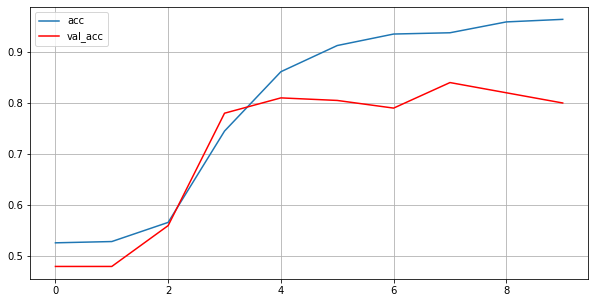

In [246]:
plt.figure(figsize=(10,5))

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc',color="red")
plt.grid()
plt.legend()

In [102]:
#LETS PREDICT IT .. FUN PART

In [103]:
#Reset the index in test data

In [104]:
df_test

224     I was physically and sexually abused as a kid...
633     I__ so fucking dumb   I__ panicking idk what ...
482     Overall I have a preety good life and my pare...
201     Should have left in the first   Month when he...
183     I had picked her up and spun her around and m...
                             ...                        
274    I__ 23 and my partner or ex has hit me a few t...
908     I was surprised he was able to become DA in t...
688     Please even a $1 or $5 is enough to help her ...
111                   She has moved away from the mother
59                     I get beat up a lot by my brother
Name: data, Length: 200, dtype: object

In [105]:
df_test2=df_test.reset_index()

In [106]:
df_test2=df_test2.drop(columns=["index"])

In [107]:
df_test2.shape

(200, 1)

In [108]:
#exploration

In [109]:
df_test2.loc[1838]

KeyError: 1838

In [110]:
df_test2.loc[1838][0]

KeyError: 1838

In [120]:
Ytest.shape

(1839,)

In [113]:
Ytest[1838]

1

In [140]:
#indexes for all the spam

In [132]:
np.where(Ytest==1)

(array([  28,   40,   43,   53,   76,   80,   82,   83,   84,   91,   92,
          96,  109,  114,  123,  126,  129,  140,  141,  154,  159,  161,
         170,  172,  183,  186,  225,  233,  234,  240,  255,  258,  262,
         291,  300,  311,  337,  338,  346,  353,  367,  373,  374,  381,
         384,  394,  398,  406,  418,  422,  426,  430,  431,  435,  437,
         440,  452,  455,  457,  488,  489,  494,  496,  527,  528,  533,
         537,  539,  542,  552,  560,  571,  573,  575,  576,  586,  587,
         593,  598,  600,  606,  607,  623,  629,  632,  636,  637,  641,
         643,  645,  651,  660,  667,  672,  673,  674,  690,  704,  714,
         729,  731,  739,  744,  752,  762,  770,  772,  777,  785,  790,
         798,  804,  820,  823,  830,  841,  845,  846,  849,  852,  853,
         864,  876,  880,  887,  891,  915,  922,  933,  934,  943,  945,
         948,  949,  954,  956,  959,  962,  966,  971,  974,  976,  997,
        1001, 1006, 1011, 1014, 1027, 

In [130]:
Ytest[1345]

0

In [89]:
k.shape

(18, 1)

In [284]:
df_test2.loc[1]

data    FREE for 1st week! No1 Nokia tone 4 ur mobile ...
Name: 1, dtype: object

In [127]:
test_token=pad_sequences(tokenizer.texts_to_sequences([df_test2.loc[1838][0]]),maxlen=162)

In [128]:
model.predict(test_token)

array([[0.5492963]], dtype=float32)

In [ ]:
#LETS TRY ANOTHER

In [142]:
[df_test2.loc[1710][0]]

['URGENT! Your Mobile number has been awarded with a å£2000 prize GUARANTEED. Call 09061790121 from land line. Claim 3030. Valid 12hrs only 150ppm']

In [143]:
test_token=pad_sequences(tokenizer.texts_to_sequences([df_test2.loc[1710][0]]),maxlen=162)

In [144]:
model.predict(test_token)

array([[0.75070894]], dtype=float32)

In [145]:
# LETS TRY WITH OUT OWN TEXT

In [321]:
test="Of course we’ve knocked down our prices for Boxing Week! Boxing glove Save big on games, accessories, and more: https://bit.ly/3mIvsRT"

In [322]:
test_Series=pd.Series(test)

In [323]:
k=pad_sequences(tokenizer.texts_to_sequences(test_Series),maxlen=162)

In [324]:
model.predict(k)

array([[0.00298834]], dtype=float32)

In [277]:
k

array([[  0,   0,   0, ...,   0,   0, 818],
       [  0,   0,   0, ...,   0,   0,  78],
       [  0,   0,   0, ...,   0,   0, 160],
       ...,
       [  0,   0,   0, ...,   0,   0, 216],
       [  0,   0,   0, ...,   0,   0, 845],
       [  0,   0,   0, ...,   0,   0,  80]], dtype=int32)